In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
%run phasedecoder907.ipynb
from src.folder_handler import *
from src.cort_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import math
import pickle
import scipy as spicy
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from scipy import signal
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
###########
# circular stats correlation
# or pearsons on sin/cos

In [3]:
with open('/mnt/c/oobootoo/rat-fes/data/pickles/3results-gregintact_729_session.pkl', 'rb') as inp:
    session729 = pickle.load(inp)
rates729 = session729.data['rates']
angles729 = session729.data['angles']
coords729 = session729.data['coords']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3results-gregintact_818_session.pkl', 'rb') as inp:
    session818 = pickle.load(inp)
rates818 = session818.data['rates']
angles818 = session818.data['angles']
coords818 = session818.data['coords']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3results-gregintact_825_session.pkl', 'rb') as inp:
    session825 = pickle.load(inp)
rates825 = session825.data['rates']
angles825 = session825.data['angles']
coords825 = session825.data['coords']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3results-gregintact_901_session.pkl', 'rb') as inp:
    session901 = pickle.load(inp)
rates901 = session901.data['rates']
angles901 = session901.data['angles']
coords901 = session901.data['coords']

In [4]:
with open('/mnt/c/oobootoo/rat-fes/data/pickles/3-results-oldgreginjured_909_session.pkl', 'rb') as inp:
    session909 = pickle.load(inp)
rates909 = session909.data['rates']
angles909 = session909.data['angles']
coords909 = session909.data['coords']

with open('/mnt/c/oobootoo/rat-fes/data/pickles/3-results-oldgreginjured_914_session.pkl', 'rb') as inp:
    session914 = pickle.load(inp)
rates914 = session914.data['rates']
angles914 = session914.data['angles']
coords914 = session914.data['coords']

In [6]:
arctans729, phase_list729, H_sin729, H_cos729, r729, full_rates = phase_train(rates729, angles729)
tsf729 = np.linspace(0, (phase_list729.shape[0]*50)/1000,phase_list729.shape[0])

arctans818, phase_list818, H_sin818, H_cos818, r818, full_rates = phase_train(rates818, angles818)
tsf818 = np.linspace(0, (phase_list818.shape[0]*50)/1000,phase_list818.shape[0])

arctans825, phase_list825, H_sin825, H_cos825, r825, full_rates = phase_train(rates825, angles825)
tsf825 = np.linspace(0, (phase_list825.shape[0]*50)/1000,phase_list825.shape[0])

arctans901, phase_list901, H_sin901, H_cos901, r901, full_rates = phase_train(rates901, angles901)
tsf901 = np.linspace(0, (phase_list901.shape[0]*50)/1000,phase_list901.shape[0])

In [ ]:
arctans909, phase_list909, H_sin909, H_cos909, r909, full_rates = phase_train_injured(rates909, angles909, phase_list901)
tsf909 = np.linspace(0, (phase_list909.shape[0]*50)/1000,phase_list909.shape[0])

arctans914, phase_list914, H_sin914, H_cos914, r914, full_rates = phase_train_injured(rates914, angles914, phase_list901)
tsf914 = np.linspace(0, (phase_list914.shape[0]*50)/1000,phase_list914.shape[0])

<bound method Figure.tight_layout of <Figure size 1200x800 with 4 Axes>>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
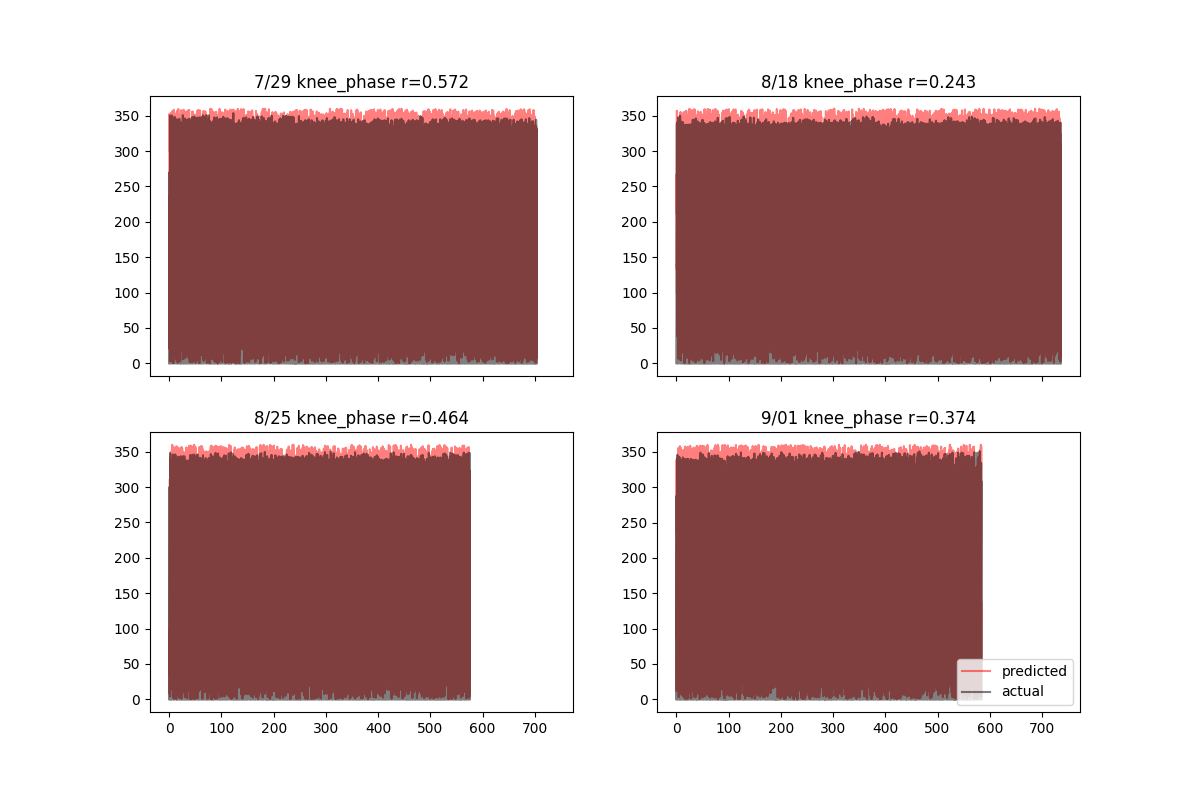

In [7]:
fig512, ax= plt.subplots(2, 2, figsize=(12,8), sharex = True)

ax[0,0].set_title('7/29 knee_phase r=' + "{0:.3f}".format(r729[1]))
ax[0,0].plot(tsf729, arctans729[:,1], c='r', alpha=0.5, label = "predicted")
ax[0,0].plot(tsf729, phase_list729[:,1], c='k', alpha=0.5, label = "actual")
ax[0,1].set_title('8/18 knee_phase r=' + "{0:.3f}".format(r818[1]))
ax[0,1].plot(tsf818, arctans818[:,1], c='r', alpha=0.5, label = "predicted")
ax[0,1].plot(tsf818, phase_list818[:,1], c='k', alpha=0.5, label = "actual")
ax[1,0].set_title('8/25 knee_phase r=' + "{0:.3f}".format(r825[1]))
ax[1,0].plot(tsf825, arctans825[:,1], c='r', alpha=0.5, label = "predicted")
ax[1,0].plot(tsf825, phase_list825[:,1], c='k', alpha=0.5, label = "actual")
ax[1,1].set_title('9/01 knee_phase r=' + "{0:.3f}".format(r901[1]))
ax[1,1].plot(tsf901, arctans901[:,1], c='r', alpha=0.5, label = "predicted")
ax[1,1].plot(tsf901, phase_list901[:,1], c='k', alpha=0.5, label = "actual")
ax[1,1].legend(loc="lower right")
fig512.tight_layout


mapping is: 4 4 6 6


<bound method Figure.tight_layout of <Figure size 960x640 with 4 Axes>>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
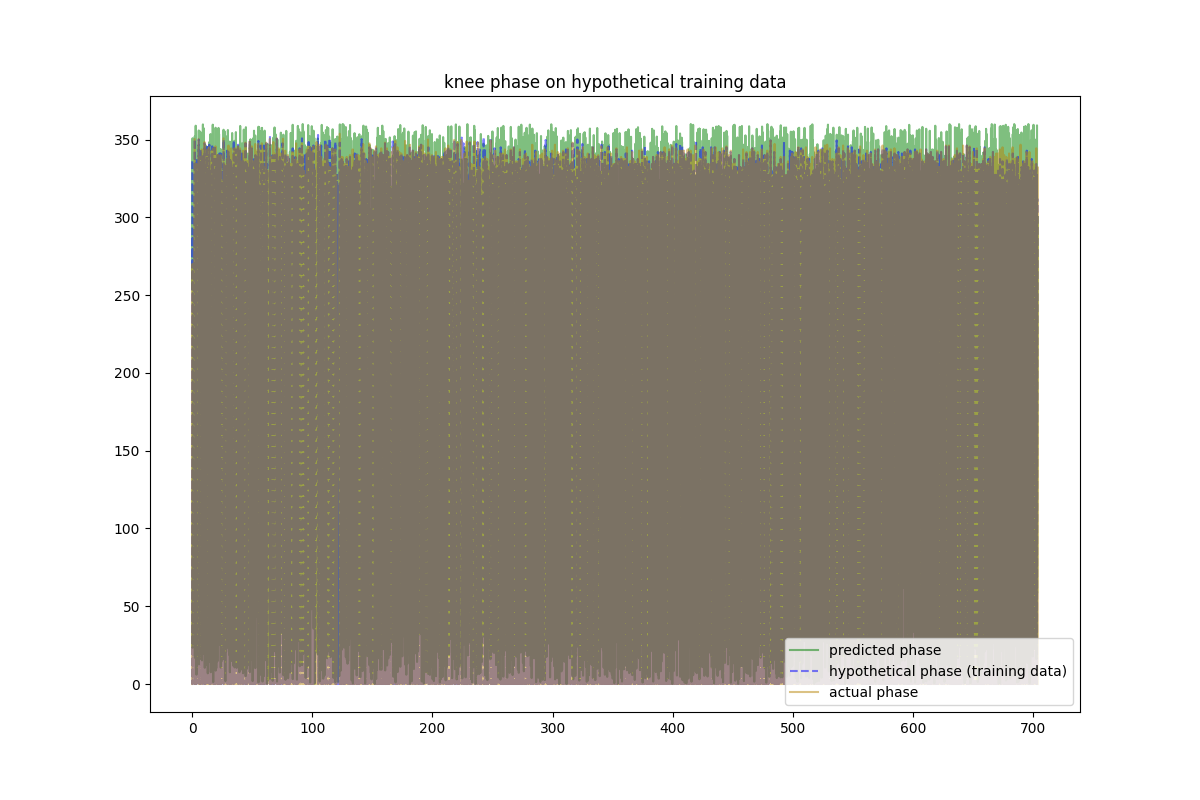

In [8]:
arctans729injured, phase_list729injured, H_sin729injured, H_cos729injured, VAF729injured, full_rates = phase_train_injured(rates729, angles729, phase_list729)
tsf729injured = np.linspace(0, (phase_list729injured.shape[0]*50)/1000,phase_list729injured.shape[0])
fig599, ax = plt.subplots(figsize=(12,8), sharex = True)
ax.set_title('knee phase on hypothetical training data')
ax.plot(tsf729injured, arctans729injured[:,1], c='g', alpha=0.5, label = "predicted phase")
ax.plot(tsf729injured, phase_list729injured[:,1], c='b', linestyle='--',alpha=0.5, label = "hypothetical phase (training data)")
ax.plot(tsf729, phase_list729[:,1], c='darkgoldenrod', alpha=0.5, label = "actual phase")
ax.legend(loc="lower right")
fig512.tight_layout

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
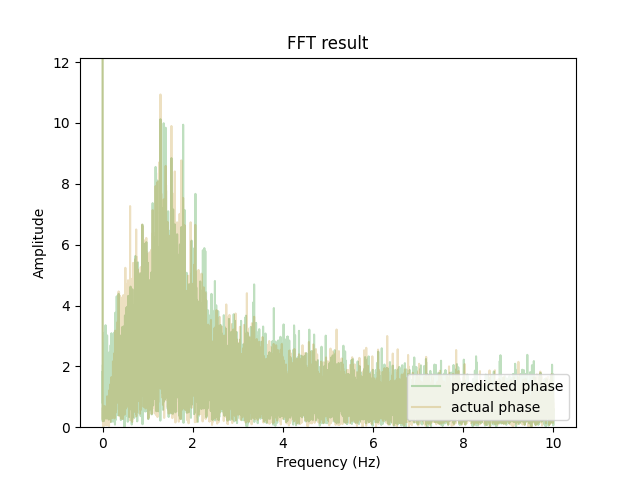

In [9]:
N = tsf729.shape[0]
# sample spacing
T = tsf729[1]-tsf729[0]
x = tsf729
y1 = arctans729injured[:,1]
y1f = fft(y1)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
y1fp = 2.0/N * np.abs(y1f[:N//2])
y2 = phase_list729injured[:,1]
y2f = fft(y2)
y2fp = 2.0/N * np.abs(y2f[:N//2])
y3 = phase_list729[:,1]
y3f = fft(y3)
y3fp = 2.0/N * np.abs(y3f[:N//2])
fig, ax = plt.subplots()
ax.plot(xf, y1fp, c='g', alpha=0.25, label = "predicted phase")
# ax.plot(xf, y2fp, c='b', linestyle='--',alpha=0.25, label = "hypothetical phase (training data)")
ax.plot(xf, y3fp, c='darkgoldenrod', alpha=0.25, label = "actual phase")
ax.set(ylabel='Amplitude',xlabel='Frequency (Hz)',title='FFT result')
ax.set_ylim([0, y1fp[np.argsort(y1fp, axis=0)[-2]] * 1.2]) 
# ax.set_xlim([0,1000])
ax.legend(loc='lower right')
plt.show()


<bound method Figure.tight_layout of <Figure size 1200x800 with 4 Axes>>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
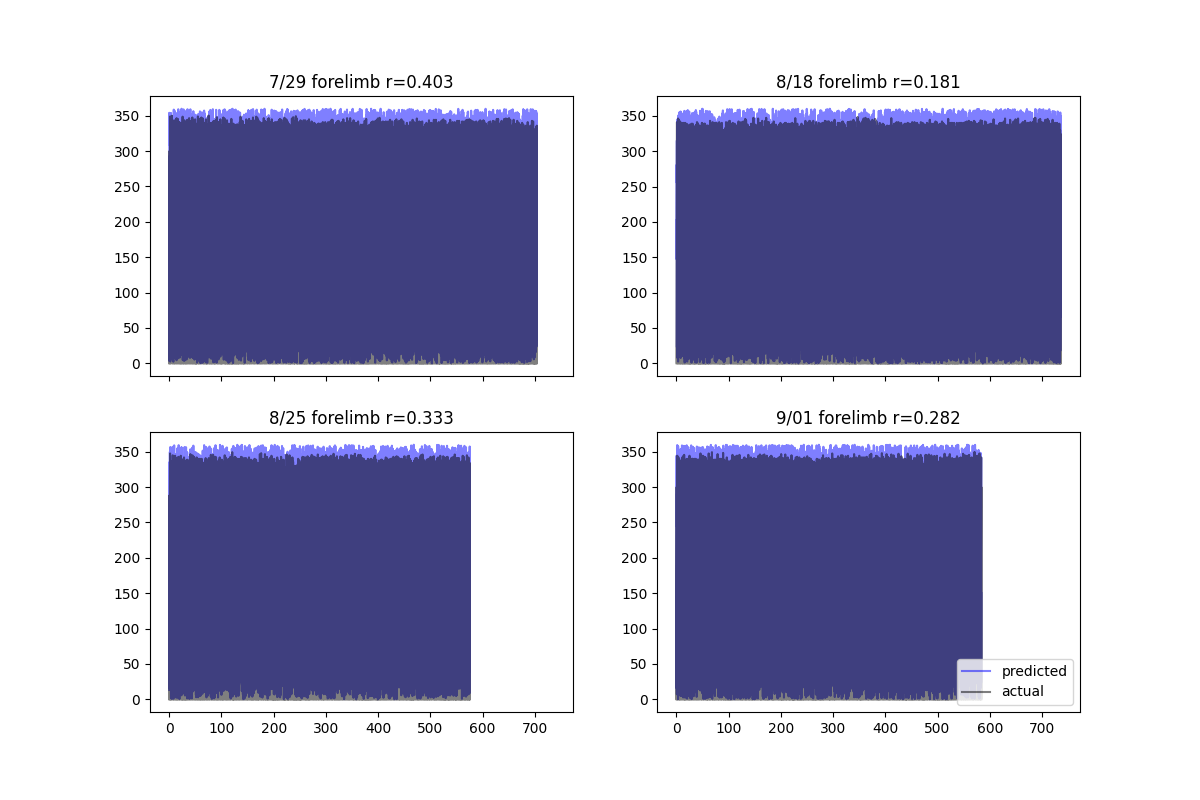

In [10]:
fig512, ax= plt.subplots(2, 2, figsize=(12,8), sharex = True)

ax[0,0].set_title('7/29 forelimb r=' + "{0:.3f}".format(r729[6]))
ax[0,0].plot(tsf729, arctans729[:,6], c='b', alpha=0.5, label = "predicted")
ax[0,0].plot(tsf729, phase_list729[:,6], c='k', alpha=0.5, label = "actual")
ax[0,1].set_title('8/18 forelimb r=' + "{0:.3f}".format(r818[6]))
ax[0,1].plot(tsf818, arctans818[:,6], c='b', alpha=0.5, label = "predicted")
ax[0,1].plot(tsf818, phase_list818[:,6], c='k', alpha=0.5, label = "actual")
ax[1,0].set_title('8/25 forelimb r=' + "{0:.3f}".format(r825[6]))
ax[1,0].plot(tsf825, arctans825[:,6], c='b', alpha=0.5, label = "predicted")
ax[1,0].plot(tsf825, phase_list825[:,6], c='k', alpha=0.5, label = "actual")
ax[1,1].set_title('9/01 forelimb r=' + "{0:.3f}".format(r901[6]))
ax[1,1].plot(tsf901, arctans901[:,6], c='b', alpha=0.5, label = "predicted")
ax[1,1].plot(tsf901, phase_list901[:,6], c='k', alpha=0.5, label = "actual")
ax[1,1].legend(loc="lower right")
fig512.tight_layout


NameError: name 'tsf909' is not defined

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
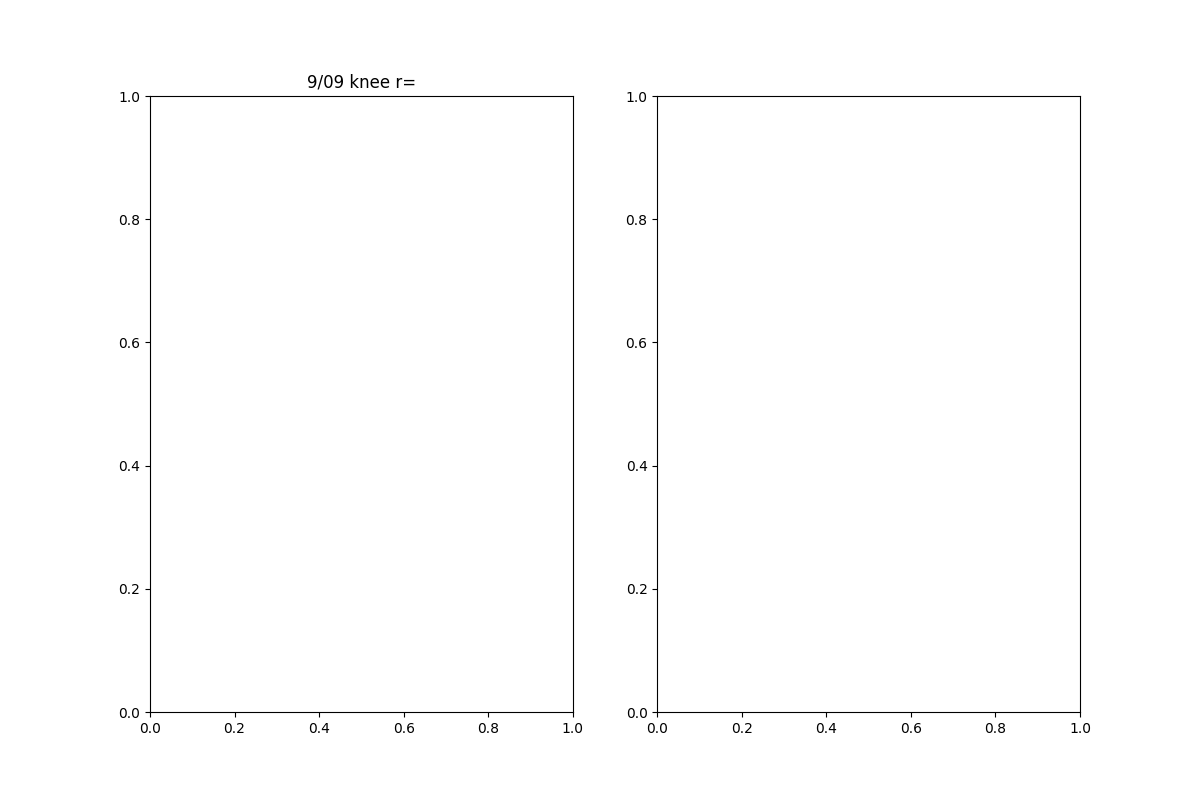

In [12]:
fig513, ax = plt.subplots(1, 2, figsize=(12,8), sharex = True)
ax[0].set_title('9/09 knee r=')# + "{0:.3f}".format(r909[1]))
ax[0].plot(tsf909, arctans909[:,3], c='r', alpha=0.5, label = "predicted")
ax[0].plot(tsf909, phase_list909[:,3], c='k', alpha=0.5, label = "hypothetical phase")
ax[1].set_title('9/14 knee r=')# + "{0:.3f}".format(r914[1]))
ax[1].plot(tsf914, arctans914[:,3], c='r', alpha=0.5, label = "predicted")
ax[1].plot(tsf914, phase_list914[:,3], c='k', alpha=0.5, label = "hypothetical phase")
ax[1].legend(loc="lower right")
fig512.tight_layout


In [ ]:
N = tsf909.shape[0]
# sample spacing
T = tsf909[1]-tsf909[0]
x = tsf909
y1 = arctans909[:,3]
y1f = fft(y1)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
y1fp = 2.0/N * np.abs(y1f[:N//2])
y2 = phase_list909[:,3]
y2f = fft(y2)
y2fp = 2.0/N * np.abs(y2f[:N//2])
fig, ax = plt.subplots()
ax.plot(xf, y2fp, alpha = 0.5, label='actual')
ax.plot(xf, y1fp, alpha = 0.5, label='predicted')

ax.set(ylabel='Amplitude',xlabel='Frequency (Hz)',title='injured limbfoot FFT result')
ax.set_ylim([0, y1fp[np.argsort(y1fp, axis=0)[-2]] * 1.2]) 
ax.legend(loc='lower right')
plt.show()

In [ ]:
fig513, ax = plt.subplots(1, 2, figsize=(12,8), sharex = True)
ax[0].set_title('9/09 forelimb r=' + "{0:.3f}".format(r909[6]))
ax[0].plot(tsf909, arctans909[:,6], c='b', alpha=0.5, label = "predicted")
ax[0].plot(tsf909, phase_list909[:,6], c='k', alpha=0.5, label = "actual phase")
ax[1].set_title('9/14 forelimb r=' + "{0:.3f}".format(r914[6]))
ax[1].plot(tsf914, arctans914[:,6], c='b', alpha=0.5, label = "predicted")
ax[1].plot(tsf914, phase_list914[:,6], c='k', alpha=0.5, label = "actual phase")
ax[1].legend(loc="lower right")
fig512.tight_layout


In [ ]:
impulse_response(H_cos729, 1)
impulse_response(H_cos825, 1)
impulse_response(H_cos901, 1)
impulse_response(H_cos909, 1)
impulse_response(H_cos914, 1)

In [23]:
# N = tsf729.shape[0]
# T = tsf729[1]-tsf729[0]
# x = tsf729
# y1 = arctans729[:,3]
# y1f = fft(y1)
# xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
# y1fp = 2.0/N * np.abs(y1f[:N//2])
# y2 = arctans729[:,4]
# y2f = fft(y2)
# y2fp = 2.0/N * np.abs(y2f[:N//2])
# fig, ax = plt.subplots()
# ax.plot(xf, y1fp, alpha = 0.5, label='limbfoot')
# ax.plot(xf, y2fp, alpha = 0.5, label='elbow')
# ax.set(ylabel='Amplitude',xlabel='Frequency (Hz)',title='FFT result')
# ax.set_ylim([0, y1fp[np.argsort(y1fp, axis=0)[-2]] * 1.2]) 
# ax.legend(loc='lower right')
# plt.show()